In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [3]:
file_path = './data/spotify_data/Spotify_Dataset_V3.csv'
df = pd.read_csv(file_path, sep=';')

In [4]:
df_subset = df.head(30000)
df_subset.to_csv('Spotify_Dataset_First_30000.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

In [6]:
df_key = df.iloc[:,:-2]
df_key.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat)
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0


In [7]:
date_unique_values = df['Date'].nunique()
date_value_counts = df['Date'].value_counts()

print("Number of unique values in the 'date' column:", date_unique_values)
print("Count of rows for each value in the 'date' column:")
print(date_value_counts)


Number of unique values in the 'date' column: 2336
Count of rows for each value in the 'date' column:
19/02/2022    349
29/01/2022    349
28/01/2022    346
01/01/2022    346
22/01/2022    346
             ... 
23/11/2020    246
26/11/2020    246
02/12/2020    246
24/11/2020    245
25/11/2020    243
Name: Date, Length: 2336, dtype: int64


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Count the number of rows for each year
year_counts = df['Year'].value_counts().sort_index()

# Count the number of rows for each month within each year
month_counts = df.groupby(['Year', 'Month']).size()

print("Number of rows for each year:")
print(year_counts)
print("\nNumber of rows for each month within each year:")
print(month_counts)



Number of rows for each year:
2017     96428
2018    103141
2019    105230
2020     98256
2021     98216
2022    107876
2023     42789
Name: Year, dtype: int64

Number of rows for each month within each year:
Year  Month
2017  1        8198
      2        6877
      3        8203
      4        7857
      5        7658
               ... 
2023  8        1442
      9        1427
      10       1422
      11       1438
      12       1424
Length: 84, dtype: int64


In [9]:
df_key.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


# EDA


## 1. Data Cleaning
### 1.1 Missing value Imputation

In [10]:
null_in_columns = df.isnull().any(axis=0)
null_in_columns

Rank                                False
Title                               False
Artists                             False
Date                                False
Danceability                        False
Energy                              False
Loudness                            False
Speechiness                         False
Acousticness                        False
Instrumentalness                    False
Valence                             False
# of Artist                         False
Artist (Ind.)                       False
# of Nationality                    False
Nationality                         False
Continent                           False
Points (Total)                      False
Points (Ind for each Artist/Nat)    False
id                                  False
Song URL                            False
Year                                False
Month                               False
dtype: bool

### 1.2 Duplicate Removal

In [11]:
duplicates_in_columns = df.apply(lambda col: col.duplicated().any())
print(duplicates_in_columns)

Rank                                True
Title                               True
Artists                             True
Date                                True
Danceability                        True
Energy                              True
Loudness                            True
Speechiness                         True
Acousticness                        True
Instrumentalness                    True
Valence                             True
# of Artist                         True
Artist (Ind.)                       True
# of Nationality                    True
Nationality                         True
Continent                           True
Points (Total)                      True
Points (Ind for each Artist/Nat)    True
id                                  True
Song URL                            True
Year                                True
Month                               True
dtype: bool


In [12]:
df[df.duplicated(subset=['id','Title'],keep=False)]

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Year,Month
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023,5
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023,5
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,2023,5
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023,5
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,2017-01-01,0.273,0.794,-6644.0,0.068,0.022,0.000,...,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...,2017,1
651932,198,Superstition - Single Version,Stevie Wonder,2017-01-01,0.650,0.658,-10908.0,0.085,0.089,0.004,...,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...,2017,1
651933,199,Secrets,The Weeknd,2017-01-01,0.665,0.771,-5779.0,0.053,0.016,0.000,...,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...,2017,1
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,...,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,2017,1


### 1.3 Data distribution

The bin with the highest frequency is from -290.20000000000437 to 69.63999999999942


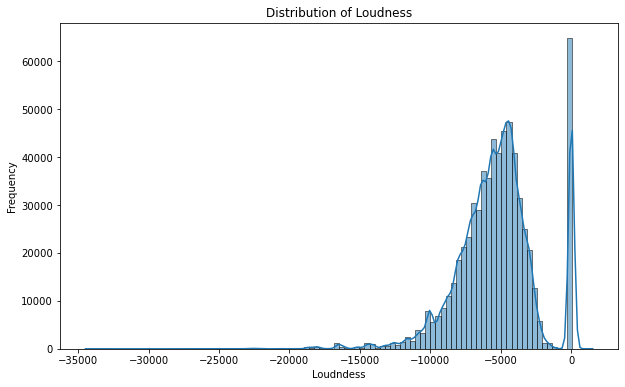

In [13]:
loundess_data = df['Loudness']

counts, bin_edges = np.histogram(loundess_data, bins=100)

max_index = np.argmax(counts)

print(f"The bin with the highest frequency is from {bin_edges[max_index]} to {bin_edges[max_index + 1]}")

plt.figure(figsize=(10, 6))
sns.histplot(loundess_data, bins=100,kde = True) 
plt.xlabel('Loudndess')
plt.ylabel('Frequency')
plt.title('Distribution of Loudness')

plt.savefig('loudness_distribution.png', dpi=300)
plt.show()

The bin with the highest frequency is from 0.0338 to 0.0456


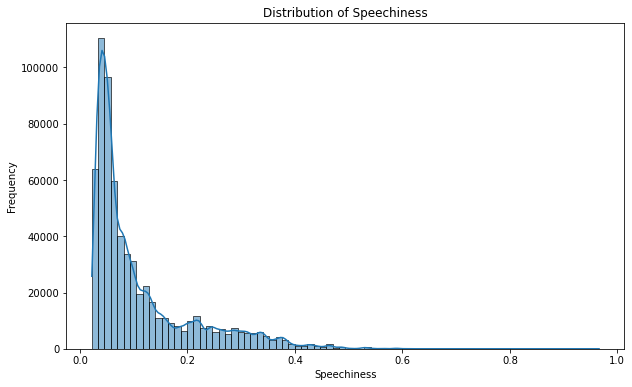

In [14]:
Speechiness_data = df['Speechiness']

counts, bin_edges = np.histogram(Speechiness_data, bins=80)

max_index = np.argmax(counts)

print(f"The bin with the highest frequency is from {bin_edges[max_index]} to {bin_edges[max_index + 1]}")

plt.figure(figsize=(10, 6))
sns.histplot(Speechiness_data, bins=80,kde = True)  
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.title('Distribution of Speechiness')
plt.savefig('Speechiness_distribution.png', dpi=300)
plt.show()

The bin with the highest frequency is from 0.7417999999999999 to 0.7722


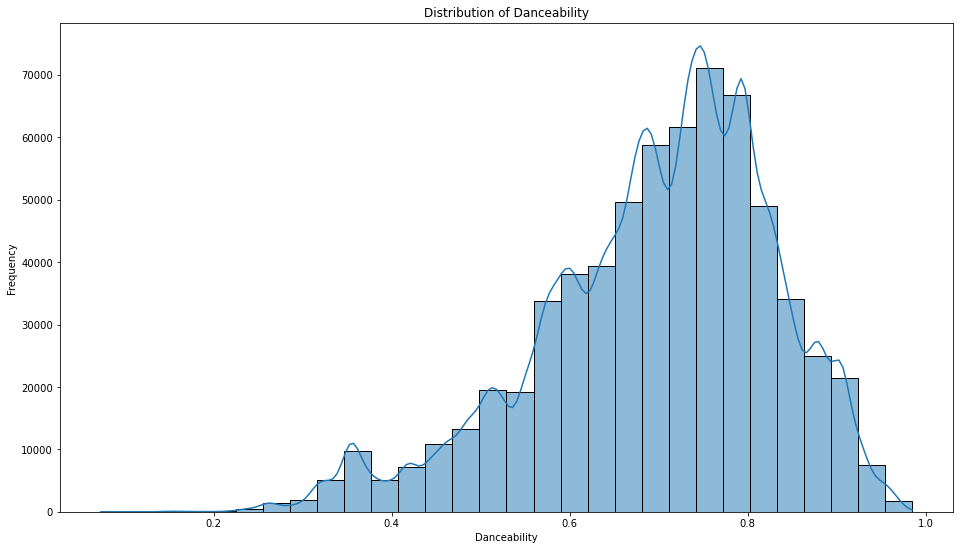

In [15]:
Danceability_data = df['Danceability']

counts, bin_edges = np.histogram(Danceability_data, bins=30)

max_index = np.argmax(counts)

print(f"The bin with the highest frequency is from {bin_edges[max_index]} to {bin_edges[max_index + 1]}")

plt.figure(figsize=(16, 9))
sns.histplot(Danceability_data, bins=30,kde = True)  
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.savefig('Danceability_distribution.png', dpi=300)
plt.show()

### 1.4 Data Type Conversion

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                         

### 1.5 Data correlation

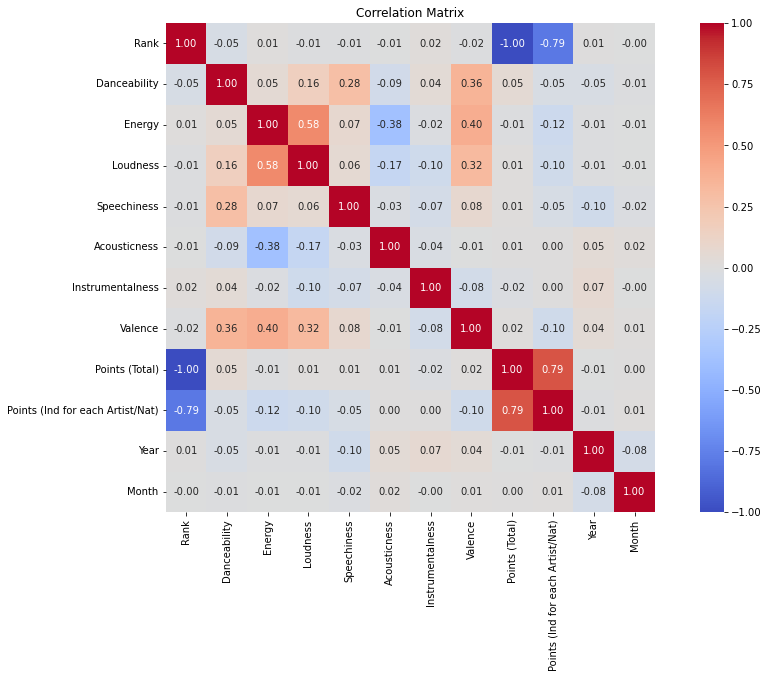

In [17]:
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(16, 9))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation matrix.png', dpi=300)
plt.show()


### 1.6 Song Features Over Time 


In [18]:
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Year,Month
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023,5
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,2023,5
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,...,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,2023,5
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023,5
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,...,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,2017-01-01,0.273,0.794,-6644.0,0.068,0.022,0.000,...,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...,2017,1
651932,198,Superstition - Single Version,Stevie Wonder,2017-01-01,0.650,0.658,-10908.0,0.085,0.089,0.004,...,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...,2017,1
651933,199,Secrets,The Weeknd,2017-01-01,0.665,0.771,-5779.0,0.053,0.016,0.000,...,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...,2017,1
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,...,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,2017,1


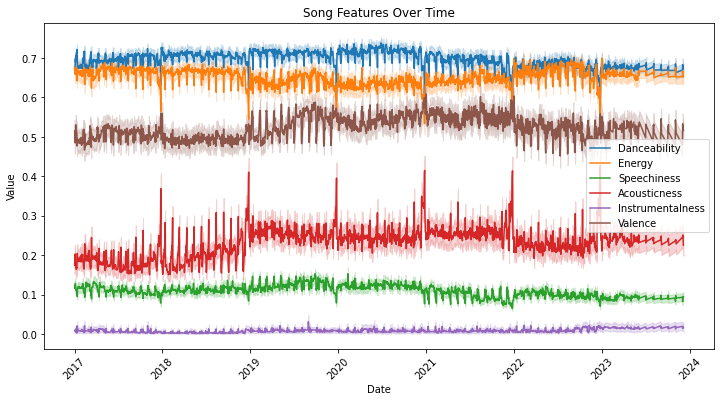

In [19]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select columns for analysis
time_features_cols = ['Danceability','Energy','Speechiness','Acousticness','Instrumentalness','Valence']  # Add more if needed

# Create Line Plot or Area Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y=time_features_cols[0], label=time_features_cols[0])
sns.lineplot(data=df, x='Date', y=time_features_cols[1], label=time_features_cols[1])
sns.lineplot(data=df, x='Date', y=time_features_cols[2], label=time_features_cols[2])
sns.lineplot(data=df, x='Date', y=time_features_cols[3], label=time_features_cols[3])
sns.lineplot(data=df, x='Date', y=time_features_cols[4], label=time_features_cols[4])
sns.lineplot(data=df, x='Date', y=time_features_cols[5], label=time_features_cols[5])
plt.title('Song Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('song_features_over_time.png', dpi=300)
plt.show()

# 2 Data processing

### 2.1 PCA

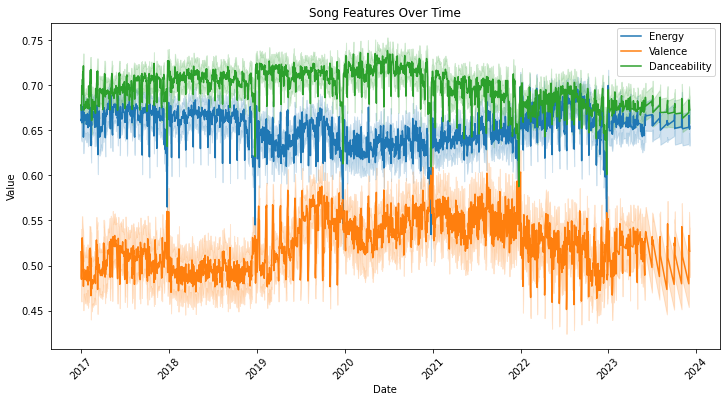

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

# Select columns for analysis
time_features_cols = ['Energy', 'Valence','Danceability'] 

# Create Line Plot or Area Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y=time_features_cols[0], label=time_features_cols[0])
sns.lineplot(data=df, x='Date', y=time_features_cols[1], label=time_features_cols[1])
sns.lineplot(data=df, x='Date', y=time_features_cols[2], label=time_features_cols[2])
plt.title('Song Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [21]:
categorical_data = df.select_dtypes(include=['object'])
numeric_data = df.select_dtypes(include=['float64', 'int64'])

label_encoder = LabelEncoder()
categorical_data_encoded = categorical_data.apply(label_encoder.fit_transform)

categorical_data_encoded


,Title,Artists,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,id,Song URL
0,1852,859,0,617,0,41,4,4568,4568
1,1852,859,1,1558,1,41,4,4568,4568
2,6692,232,0,183,0,53,4,9016,9016
3,3347,2836,0,2121,0,41,4,2958,2958
4,3347,2836,1,1558,1,41,4,2958,2958
...,...,...,...,...,...,...,...,...,...
651931,4454,1851,0,1352,0,70,3,2191,2191
651932,5925,2496,0,1841,0,71,1,6817,6817
651933,5425,2620,0,1958,0,11,1,3823,3823
651934,4243,1128,0,832,0,71,1,2753,2753


In [22]:
encoded_df_temp = pd.concat([categorical_data_encoded, numeric_data], axis=1)
# encoded_df_temp_1 = numeric_data
# encoded_df_temp_2 = pd.concat([numeric_data, df['Date']], axis=1)
# (encoded_df_temp_2['Date']>='2017-01-01') & (encoded_df_temp_2['Date']<'2018-01-01')

# encoded_df_temp = encoded_df_temp_2[(encoded_df_temp_2['Date']>='2017-01-01') & (encoded_df_temp_2['Date']<'2018-01-01')]



encoded_df = encoded_df_temp.drop(columns=['Rank','Points (Total)','Points (Ind for each Artist/Nat)'])
encoded_df

,Title,Artists,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,id,Song URL,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Year,Month
0,1852,859,0,617,0,41,4,4568,4568,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,2023,5
1,1852,859,1,1558,1,41,4,4568,4568,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,2023,5
2,6692,232,0,183,0,53,4,9016,9016,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,2023,5
3,3347,2836,0,2121,0,41,4,2958,2958,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,2023,5
4,3347,2836,1,1558,1,41,4,2958,2958,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,4454,1851,0,1352,0,70,3,2191,2191,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,2017,1
651932,5925,2496,0,1841,0,71,1,6817,6817,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,2017,1
651933,5425,2620,0,1958,0,11,1,3823,3823,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,2017,1
651934,4243,1128,0,832,0,71,1,2753,2753,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,2017,1


In [23]:
scaler = StandardScaler()
scaled_encoded = scaler.fit_transform(encoded_df)
print(len(scaled_encoded))
scaled_encoded

651936


array([[-0.91155245, -0.68262464, -0.49652583, ...,  1.38825197,
         1.74106968, -0.39613305],
       [-0.91155245, -0.68262464,  0.69677034, ...,  1.38825197,
         1.74106968, -0.39613305],
       [ 1.34107642, -1.42367609, -0.49652583, ..., -1.29120366,
         1.74106968, -0.39613305],
       ...,
       [ 0.75139031,  1.39870168, -0.49652583, ...,  1.07564881,
        -1.48008904, -1.55048135],
       [ 0.20126483, -0.36469347, -0.49652583, ...,  0.71838806,
        -1.48008904, -1.55048135],
       [ 0.20126483, -0.36469347,  0.69677034, ...,  0.71838806,
        -1.48008904, -1.55048135]])

In [24]:
pca = PCA()
pca_result = pca.fit_transform(scaled_encoded)
# len(pca_result)
# for ele in pca_result:
#     print(len(ele))

In [25]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
len(explained_variance_ratio)

18

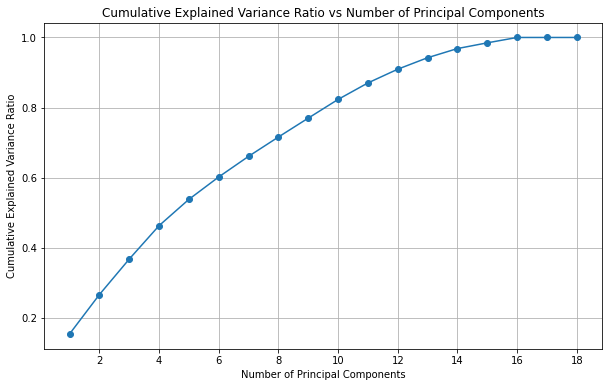

In [26]:
# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Principal Components')
plt.grid(True)
ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.savefig('Cumulative Variance Ratio vs Number of Components.png', dpi=300)
plt.show()

In [27]:
threshold =0.85
n_components_retained = (cumulative_explained_variance >= threshold).argmax() + 1
print(n_components_retained)

11


In [28]:
result_df = pd.DataFrame(pca_result[:,:n_components_retained])
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.707530,-0.419574,0.122194,-0.805696,-2.631872,-0.274513,0.491075,0.037541,0.462567,-1.506044,-0.131151
1,1.590906,-0.186318,0.627932,0.720957,-1.972320,-0.469721,0.551223,0.112862,0.492128,-1.520289,-0.200496
2,-1.069199,1.981963,1.622961,-2.339442,-1.799475,-3.329013,2.962025,7.179890,5.417639,4.825933,0.862562
3,-0.000747,-0.591919,-0.836746,1.904306,-1.021377,2.512531,1.534526,0.251600,-0.024999,0.249241,-1.645589
4,0.962111,-0.577780,0.498615,2.030470,-0.463530,2.114178,1.532287,0.235637,-0.036170,0.132043,-1.654651
...,...,...,...,...,...,...,...,...,...,...,...
651931,-1.138898,-1.338192,-0.702649,0.610398,0.043858,-1.984084,-0.196242,-0.056495,-2.161023,1.368368,0.944627
651932,-0.982841,1.434572,-1.432754,0.884396,1.037935,0.444583,0.926323,-0.218708,-0.120057,0.170143,1.978540
651933,0.308291,-0.334724,-2.196868,1.363691,-0.140341,0.271495,0.564636,-0.238087,-0.744514,1.293331,1.829297
651934,0.186854,-1.145445,-1.003851,-1.254980,1.659701,0.911869,0.972693,0.233626,-1.022469,0.456206,0.859048


## 3. Data Training 

In [29]:
X = result_df
y = df['Points (Total)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3276.787702624622


In [ ]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
  
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

In [ ]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)